
# Creating Heatmap from Matpltlib Doc


It is often desirable to show data which depends on two independent
variables as a color coded image plot. This is often referred to as a
heatmap. If the data is categorical, this would be called a categorical
heatmap.

Matplotlib's `~matplotlib.axes.Axes.imshow` function makes
production of such plots particularly easy.

The following examples show how to create a heatmap with annotations.
We will start with an easy example and expand it to be usable as a
universal function.


In [1]:
%matplotlib inline

In [3]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

The above now allows us to keep the actual plot creation pretty compact.




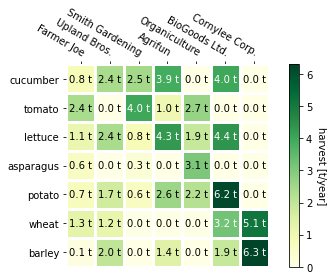

In [4]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

Some more complex heatmap examples
----------------------------------

In the following we show the versatility of the previously created
functions by applying it in different cases and using different arguments.




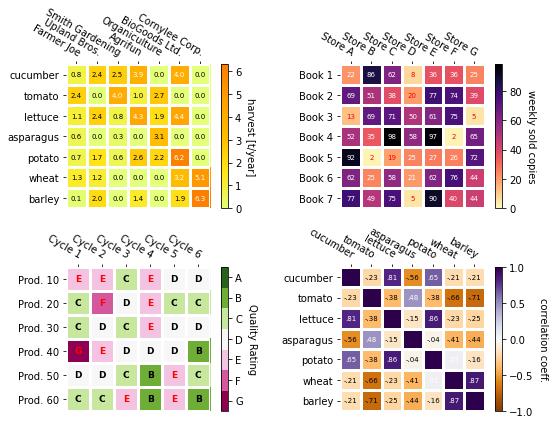

In [5]:
np.random.seed(19680801)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Replicate the above example with a different font size and colormap.

im, _ = heatmap(harvest, vegetables, farmers, ax=ax,
                cmap="Wistia", cbarlabel="harvest [t/year]")
annotate_heatmap(im, valfmt="{x:.1f}", size=7)

# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

data = np.random.randint(2, 100, size=(7, 7))
y = ["Book {}".format(i) for i in range(1, 8)]
x = ["Store {}".format(i) for i in list("ABCDEFG")]
im, _ = heatmap(data, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="weekly sold copies")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

# Sometimes even the data itself is categorical. Here we use a
# `matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes.

data = np.random.randn(6, 6)
y = ["Prod. {}".format(i) for i in range(10, 70, 10)]
x = ["Cycle {}".format(i) for i in range(1, 7)]

qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=plt.get_cmap("PiYG", 7), norm=norm,
                cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
                cbarlabel="Quality Rating")

annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1,
                 textcolors=("red", "black"))

# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# `matplotlib.ticker.FuncFormatter`.

corr_matrix = np.corrcoef(harvest)
im, _ = heatmap(corr_matrix, vegetables, vegetables, ax=ax4,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")


def func(x, pos):
    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)


plt.tight_layout()
plt.show()